In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('dataV3.0\抽样结果.csv',encoding='GB18030')
df = df.iloc[:,1:]
df.fillna(1)

,被试数量,样本序号,实验序号,实验处理,误差,p值
0,2,1,Exp1,D2U,1,1.000000e+00
1,2,1,Exp1,L2R,1,7.539062e-01
2,2,1,Exp1,R2L,1,7.539062e-01
3,2,1,Exp1,U2D,1,2.148438e-02
4,2,1,Exp2,"(0, 267.22222222222223)",prediction_error,3.823533e-03
...,...,...,...,...,...,...
7555,10,20,Exp3,"(1, 1)",predictError,3.403482e-65
7556,10,20,Exp3,"(2, -1)",predictError,1.812218e-57
7557,10,20,Exp3,"(2, 1)",predictError,2.573244e-69
7558,10,20,Exp3,"(3, -1)",predictError,2.464369e-40


In [46]:
dfGroup = df.groupby(['实验序号','实验处理'])[['被试数量','p值','样本序号']]



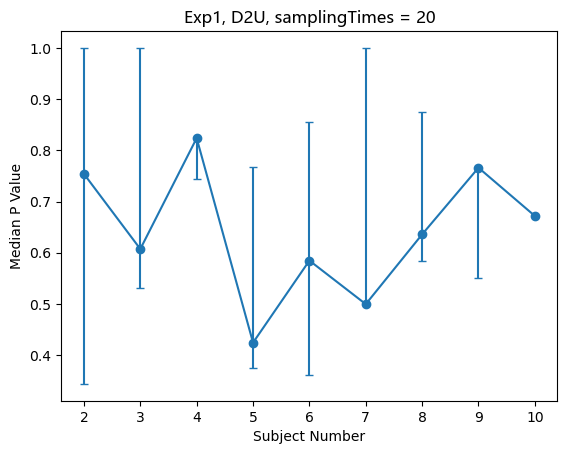

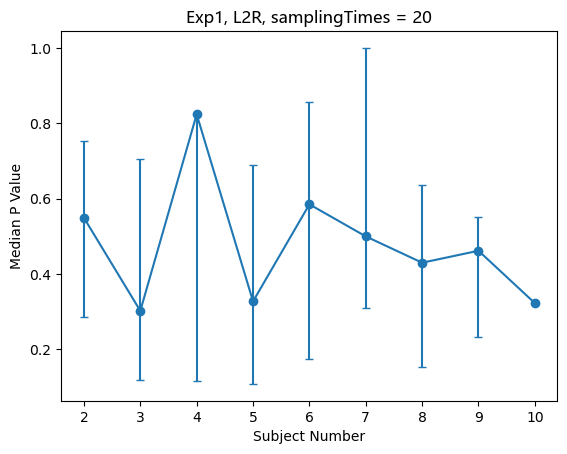

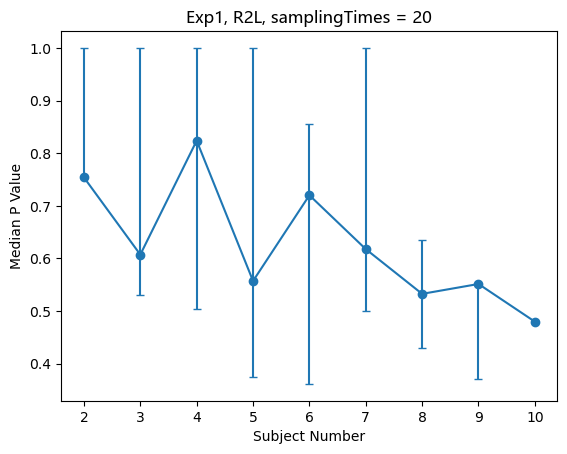

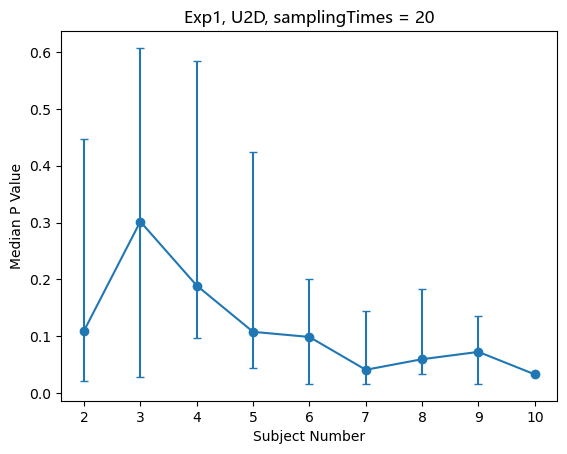

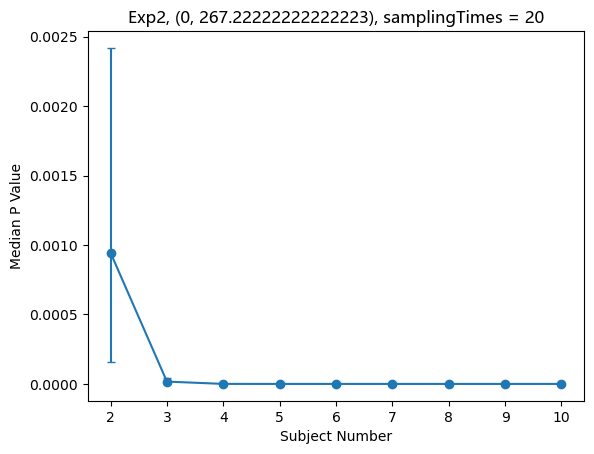

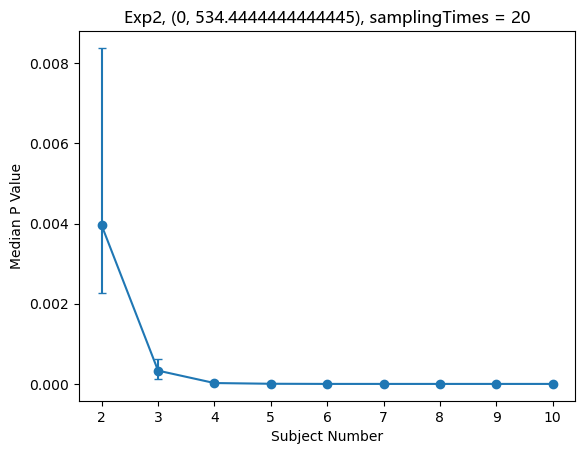

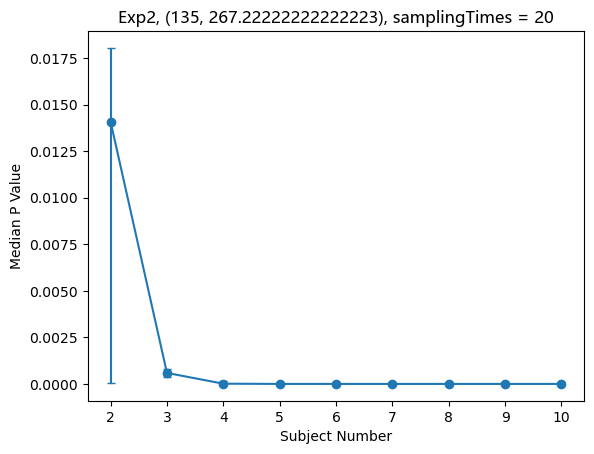

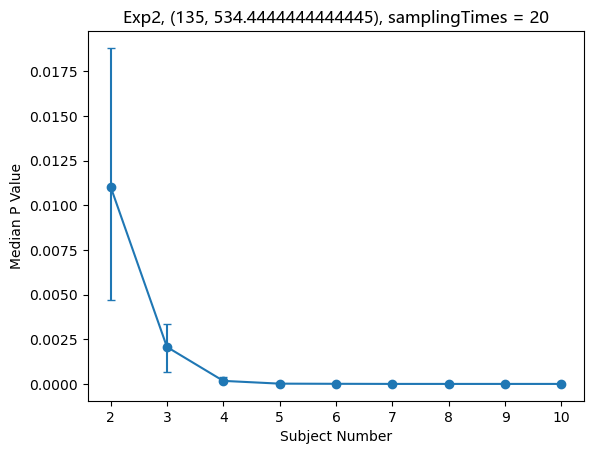

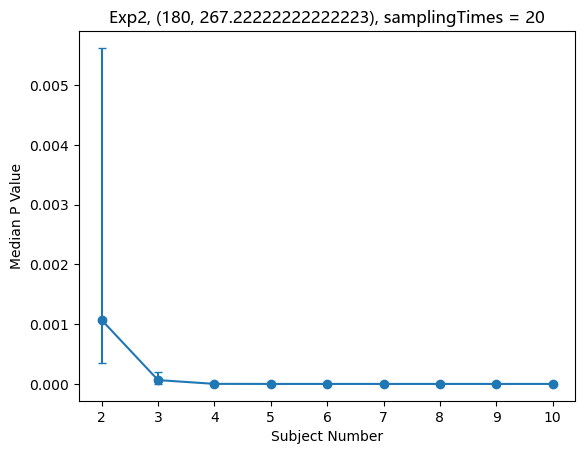

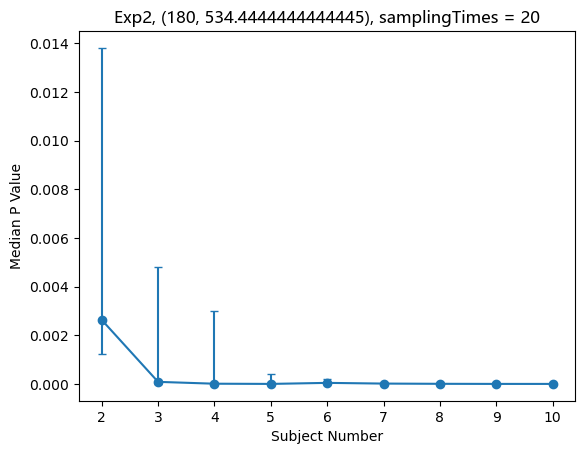

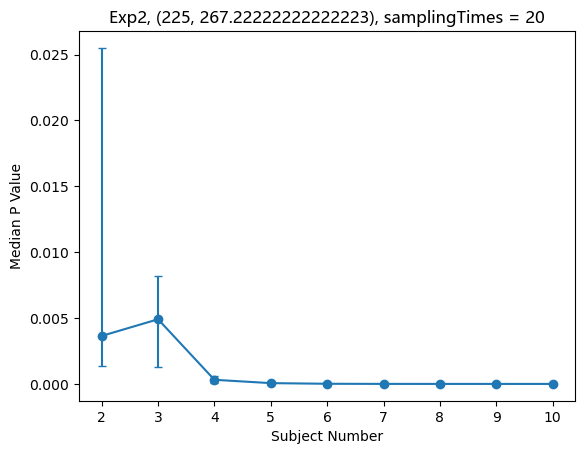

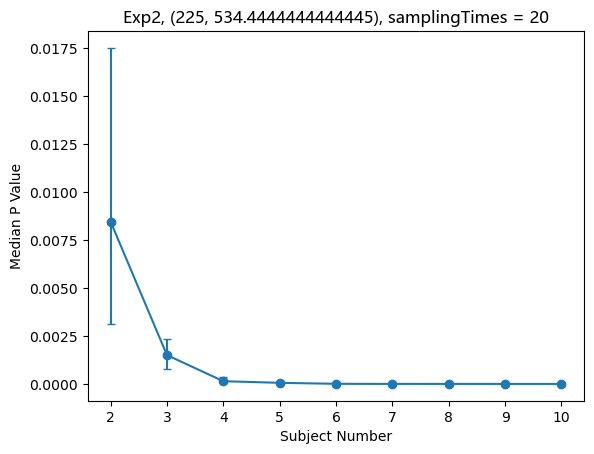

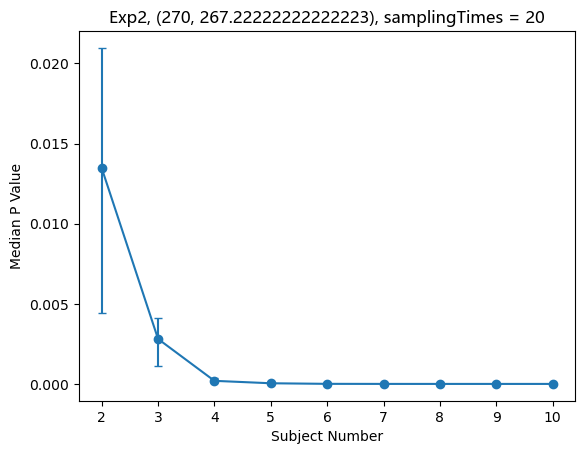

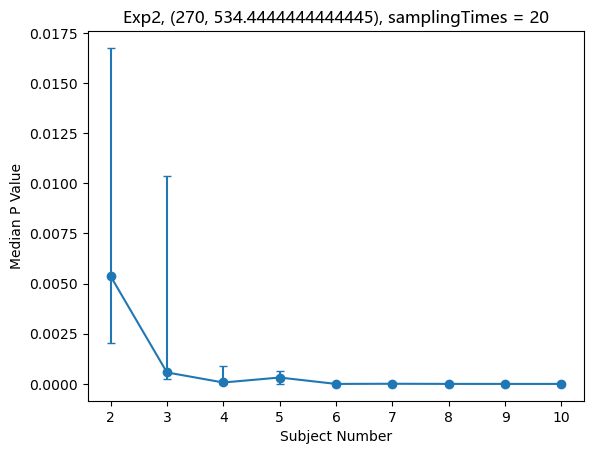

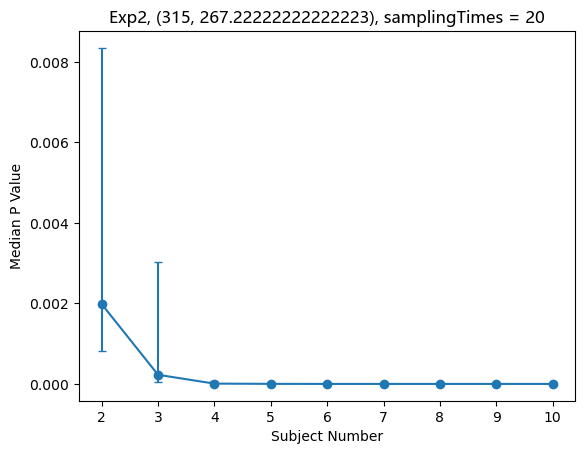

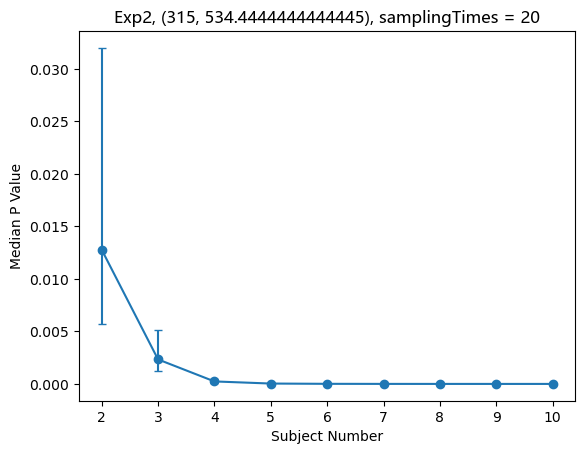

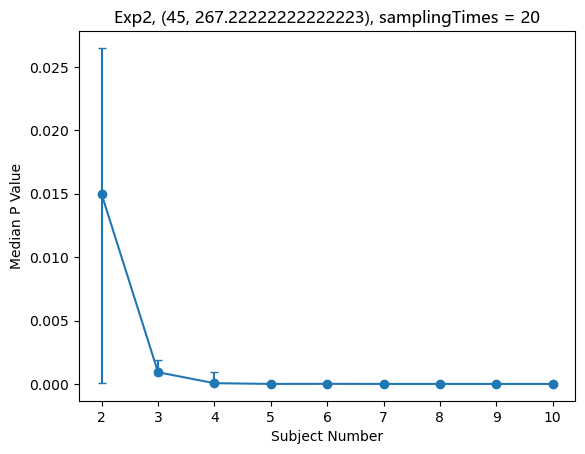

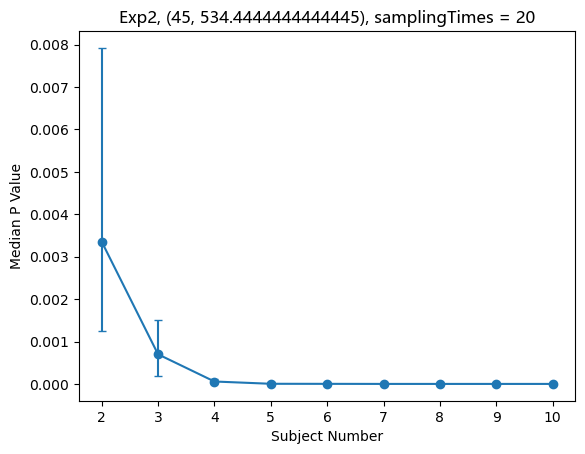

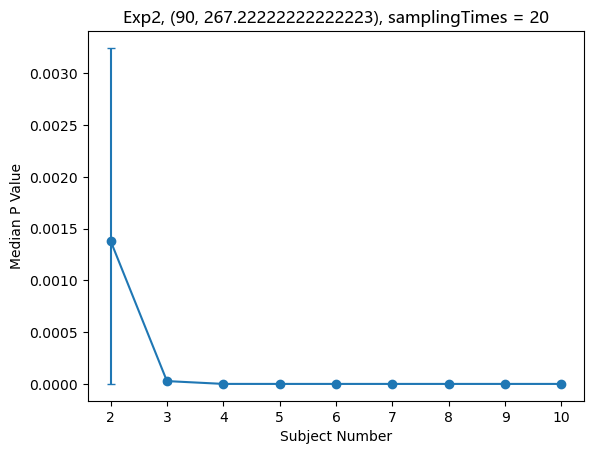

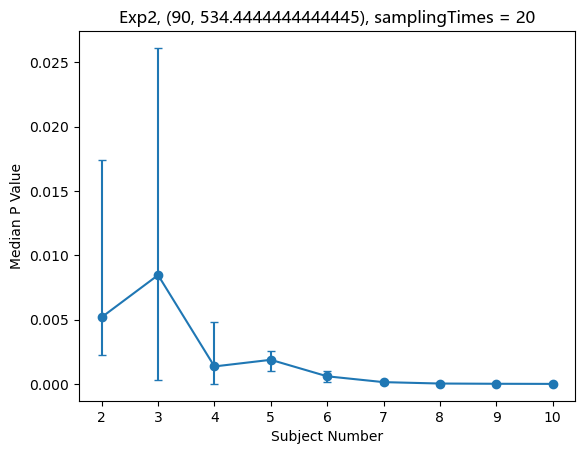

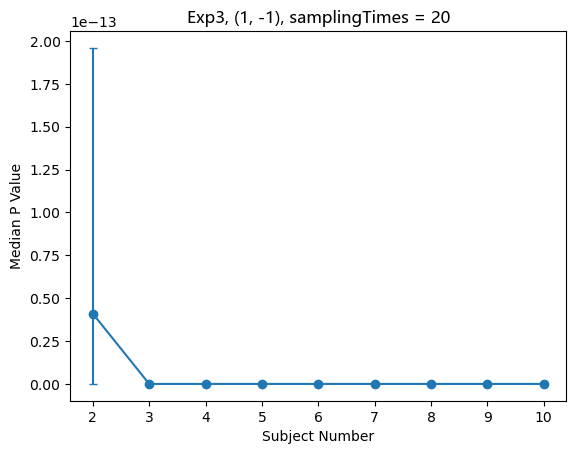

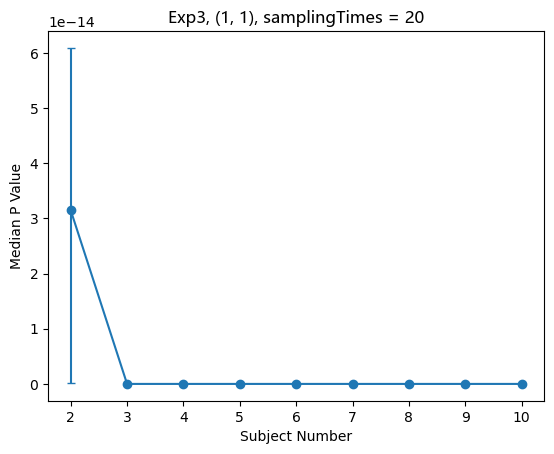

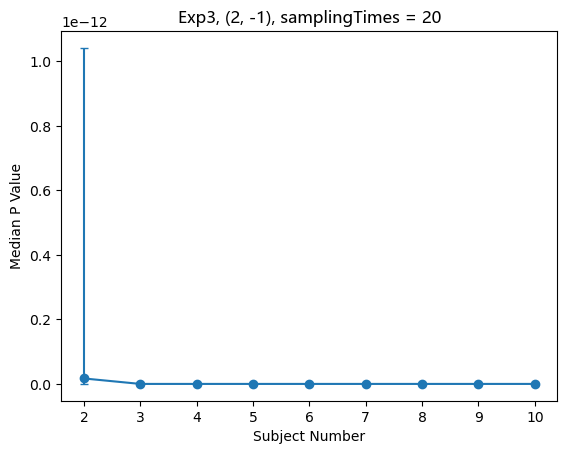

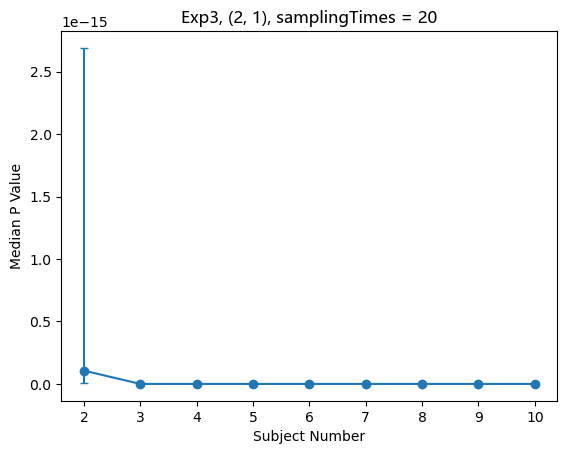

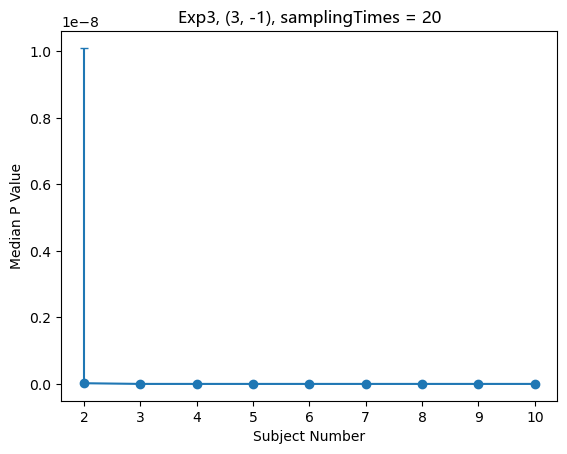

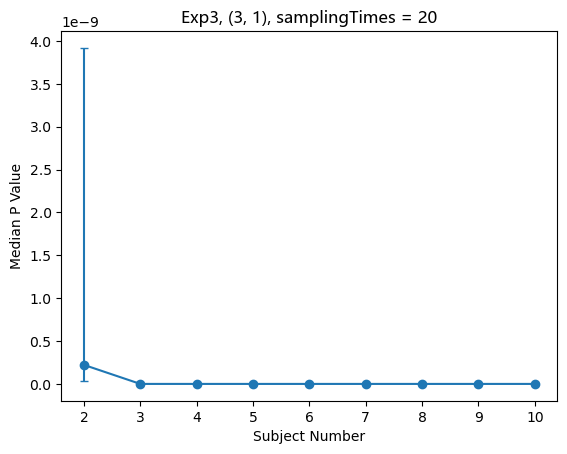

In [48]:
def Drawfig(multiIndex,DataSeries,SamplingColumn,GroupColumn,TargetColumn):
    Sampling = len(DataSeries[SamplingColumn].unique())
    grouped = DataSeries.groupby(GroupColumn)
    Median = grouped.median()
    Q1 = grouped.quantile(0.25)
    Q3 = grouped.quantile(0.75)
    plt.errorbar(Median.index, Median[TargetColumn], 
                 yerr=[Median[TargetColumn] - Q1[TargetColumn], Q3[TargetColumn] - Median[TargetColumn]], 
                 fmt='-o',capsize=3)
    plt.xlabel('Subject Number')
    plt.ylabel('Median P Value')
    plt.title(f'{multiIndex[0]}, {multiIndex[1]}, samplingTimes = {Sampling}',fontdict={'fontfamily':'Microsoft YaHei'})
    plt.grid(False)
    plt.show()
for multiIndex,DataSeries in dfGroup:
     Drawfig(multiIndex,DataSeries,'样本序号','被试数量','p值')

